In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df= pd.read_csv(r"C:\Users\gauta\OneDrive\Documents\brainwave intern\train.csv")

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
#calculationg null valuse

null_count = df['Postal Code'].isnull().sum()
print(null_count)

11


In [5]:
# filling null valuse

df["Postal Code"].fillna(0, inplace=True)

# changinf from float to integer
df['Postal Code'] = df['Postal Code'].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   int32  
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55211.280918,230.769059
std,2829.160653,32076.677954,626.651875
min,1.000000,0.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


## Data Cleaning

### Checking for duplicates

In [7]:
# using conditional statement

if df.duplicated().sum()> 0:
    print('Duplicate are present')
else:
    print('No Duplicates exist')

No Duplicates exist


In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Length: 9800, dtype: bool

In [9]:
df.duplicated(keep= False).sum()

0

# Exploratory Data Analysis

## Customer analysis

### Customer segmentation

In [10]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [11]:
# types of customers

types_of_customers = df['Segment'].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [12]:
# number of customer in each segment

number_of_customers = df['Segment'].value_counts().reset_index()

number_of_customers= number_of_customers.rename(columns={'Segment':'Customer Type','count':'Total Customers'})

print(number_of_customers)

  Customer Type  Total Customers
0      Consumer             5101
1     Corporate             2953
2   Home Office             1746


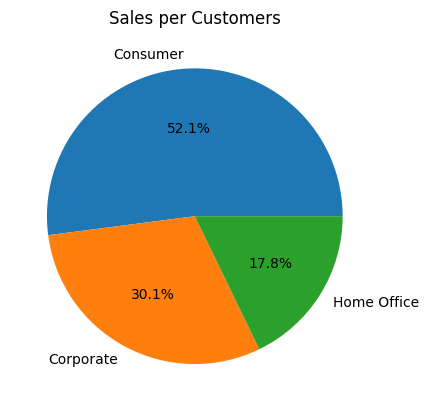

In [13]:
# Creating a pie chart

plt.pie(number_of_customers['Total Customers'], labels=number_of_customers['Customer Type'], autopct= '%1.1f%%')

plt.title('Sales per Customers')

plt.show()

### Customers & Sales


In [14]:
sales_per_catogary = df.groupby('Segment')['Sales'].sum().reset_index()

sales_per_catogary = sales_per_catogary.rename(columns={'Segment':'Customer Type','Sales' : 'Total Sales'})

print(sales_per_catogary)

  Customer Type   Total Sales
0      Consumer  1.148061e+06
1     Corporate  6.884941e+05
2   Home Office  4.249822e+05


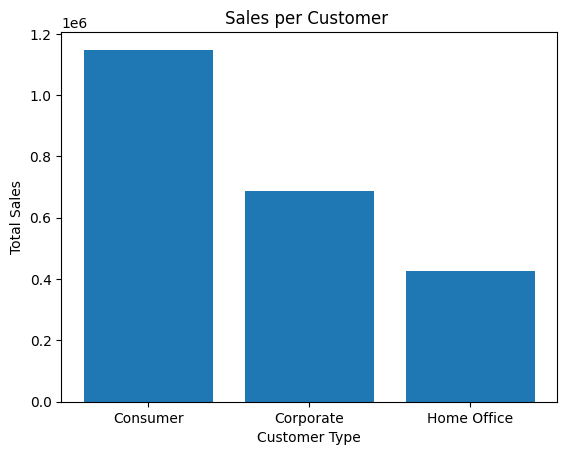

In [15]:
# bar graph

plt.bar(sales_per_catogary['Customer Type'], sales_per_catogary['Total Sales'])

# for label

plt.title('Sales per Customer ')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')

plt.show()

## Customer Layalty

In [16]:
df.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775


In [17]:
# group data : C_Id, C_Name, Segment , calculated frequency of their orders

customer_order_freq = df.groupby(['Customer ID','Customer Name','Segment']) ['Order ID'].count().reset_index()
    
customer_order_freq.rename(columns={'Order ID': 'Total Orders'}, inplace = True)

repeat_customers = customer_order_freq[customer_order_freq['Total Orders']>=1]
    
sorted_repeat_customers = repeat_customers.sort_values(by='Total Orders', ascending=False)


print(sorted_repeat_customers.head(10).reset_index(drop = True))    
    

  Customer ID        Customer Name      Segment  Total Orders
0    WB-21850        William Brown     Consumer            35
1    PP-18955           Paul Prost  Home Office            34
2    MA-17560         Matt Abelman  Home Office            34
3    JL-15835             John Lee     Consumer            33
4    CK-12205  Chloris Kastensmidt     Consumer            32
5    SV-20365          Seth Vernon     Consumer            32
6    JD-15895     Jonathan Doherty    Corporate            32
7    AP-10915       Arthur Prichep     Consumer            31
8    ZC-21910     Zuschuss Carroll     Consumer            31
9    EP-13915           Emily Phan     Consumer            31


In [18]:
# group data : C_Id, C_Name, Segment ,State

customer_sales = df.groupby(['Customer ID','Customer Name','Segment'])['Sales'].sum().reset_index()

top_spenders = customer_sales.sort_values(by= 'Sales', ascending = False)

print(top_spenders.head(10). reset_index(drop=True))

  Customer ID       Customer Name      Segment      Sales
0    SM-20320         Sean Miller  Home Office  25043.050
1    TC-20980        Tamara Chand    Corporate  19052.218
2    RB-19360        Raymond Buch     Consumer  15117.339
3    TA-21385        Tom Ashbrook  Home Office  14595.620
4    AB-10105       Adrian Barton     Consumer  14473.571
5    KL-16645        Ken Lonsdale     Consumer  14175.229
6    SC-20095        Sanjit Chand     Consumer  14142.334
7    HL-15040        Hunter Lopez     Consumer  12873.298
8    SE-20110        Sanjit Engle     Consumer  12209.438
9    CC-12370  Christopher Conant     Consumer  12129.072


## Mode of Shipping


In [19]:
df.head(4)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775


In [20]:
# sorting unique valuss in the ship mode cloumn into a new series

type_of_shipping = df['Ship Mode'].unique()
print(type_of_shipping)

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [21]:
# frequency of shipping methods

shipping_mode = df['Ship Mode'].value_counts().reset_index()
shipping_mode = shipping_mode.rename(columns={'Ship Mode':'Mode of Shipment', 'count': 'Use Frequency'})

print(shipping_mode)

  Mode of Shipment  Use Frequency
0   Standard Class           5859
1     Second Class           1902
2      First Class           1501
3         Same Day            538


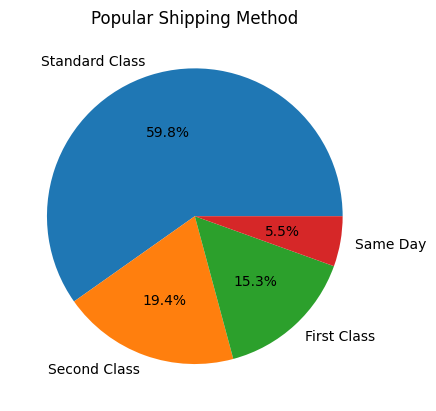

In [22]:
plt.pie(shipping_mode['Use Frequency'],labels=shipping_mode['Mode of Shipment'], autopct= '%1.1f%%')

plt.title('Popular Shipping Method')
plt.show()

## Graphical Analysis

In [23]:
# Customer by state

state = df['State'].value_counts().reset_index()

state= state.rename(columns={'count':'Number of customers'})
print(state.head(5))

          State  Number of customers
0    California                 1946
1      New York                 1097
2         Texas                  973
3  Pennsylvania                  582
4    Washington                  504


In [24]:
# customer by city

city = df['City'].value_counts().reset_index()

city= city.rename(columns={'count':'Number of customers'})
print(city.head(5))

            City  Number of customers
0  New York City                  891
1    Los Angeles                  728
2   Philadelphia                  532
3  San Francisco                  500
4        Seattle                  426


In [25]:
# sales per state

states_sales = df.groupby(['State'])['Sales'].sum().reset_index()

top_state_sales = states_sales.sort_values(by='Sales', ascending=False)

print(top_state_sales.head(11).reset_index(drop=True))

             State        Sales
0       California  446306.4635
1         New York  306361.1470
2            Texas  168572.5322
3       Washington  135206.8500
4     Pennsylvania  116276.6500
5          Florida   88436.5320
6         Illinois   79236.5170
7         Michigan   76136.0740
8             Ohio   75130.3500
9         Virginia   70636.7200
10  North Carolina   55165.9640


In [26]:
# sales per city

city_sales = df.groupby(['City'])['Sales'].sum().reset_index()

top_city_sales = city_sales.sort_values(by='Sales', ascending=False)

print(top_city_sales.head(11).reset_index(drop=True))

             City        Sales
0   New York City  252462.5470
1     Los Angeles  173420.1810
2         Seattle  116106.3220
3   San Francisco  109041.1200
4    Philadelphia  108841.7490
5         Houston   63956.1428
6         Chicago   47820.1330
7       San Diego   47521.0290
8    Jacksonville   44713.1830
9         Detroit   42446.9440
10    Springfield   41827.8100


## Product Analysis

In [27]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [28]:
# types of product 

product_category = df['Category'].unique()
print(product_category)

['Furniture' 'Office Supplies' 'Technology']


In [31]:
# types of product by sub category

subcategory_count = df.groupby('Category')['Sub-Category'].nunique().reset_index()

subcategory_count= subcategory_count.sort_values(by='Sub-Category', ascending = False)

print(subcategory_count.reset_index(drop=True))

          Category  Sub-Category
0  Office Supplies             9
1        Furniture             4
2       Technology             4


In [33]:
# sales per each category

category_sales = df.groupby(['Category'])['Sales'].sum().reset_index()

category_sales= category_sales.sort_values(by='Sales', ascending = False)


print(category_sales)

          Category        Sales
2       Technology  827455.8730
0        Furniture  728658.5757
1  Office Supplies  705422.3340


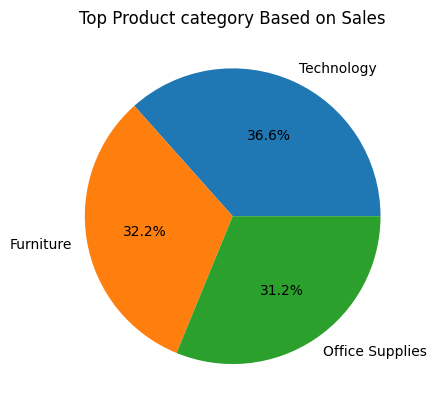

In [34]:
plt.pie(category_sales['Sales'],labels=category_sales['Category'], autopct= '%1.1f%%')

plt.title('Top Product category Based on Sales')
plt.show()

In [37]:
# group data by product sub category vs sales
top_pdt_subcategory
pdt_subcategory = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()

top_pdt_subcategory = pdt_subcategory.sort_values(by='Sales',ascending=False)

print(top_pdt_subcategory.reset_index(drop=True))

   Sub-Category        Sales
0        Phones  327782.4480
1        Chairs  322822.7310
2       Storage  219343.3920
3        Tables  202810.6280
4       Binders  200028.7850
5      Machines  189238.6310
6   Accessories  164186.7000
7       Copiers  146248.0940
8     Bookcases  113813.1987
9    Appliances  104618.4030
10  Furnishings   89212.0180
11        Paper   76828.3040
12     Supplies   46420.3080
13          Art   26705.4100
14    Envelopes   16128.0460
15       Labels   12347.7260
16    Fasteners    3001.9600


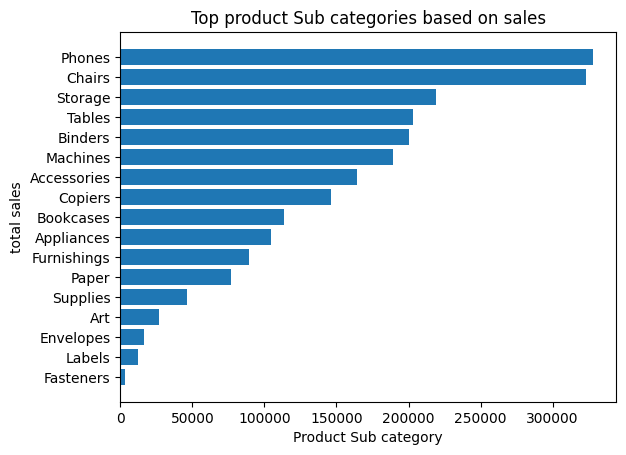

In [41]:
top_pdt_subcategory = top_pdt_subcategory.sort_values(by='Sales',ascending=True)

plt.barh(top_pdt_subcategory['Sub-Category'],top_pdt_subcategory['Sales'])

plt.title('Top product Sub categories based on sales')
plt.xlabel('Product Sub category')
plt.ylabel('total sales')

plt.show()

## Sales trends

In [43]:
# converting order date to date time format

df['Order Date']= pd.to_datetime(df['Order Date'],dayfirst=True)

# grouping by year and summing sales per year

yearly_sales= df.groupby(df['Order Date'].dt.year)['Sales'].sum()

yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date':'Year','Sales':'Total Sales'})

print(yearly_sales)

   Year  Total Sales
0  2015  479856.2081
1  2016  459436.0054
2  2017  600192.5500
3  2018  722052.0192


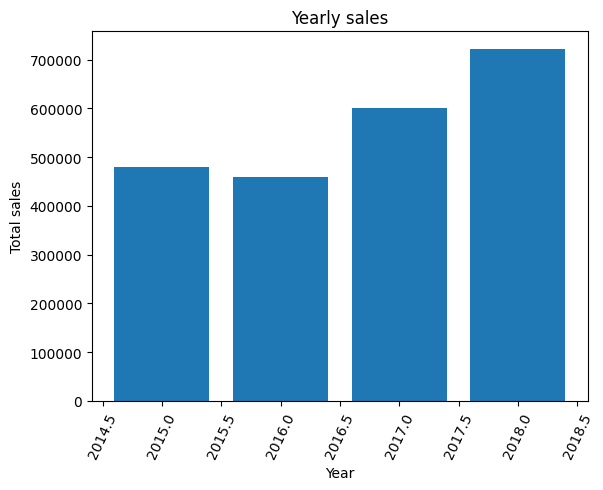

In [45]:


plt.bar(yearly_sales['Year'],yearly_sales['Total Sales'])

plt.title('Yearly sales')
plt.xlabel('Year')
plt.ylabel('Total sales')

plt.xticks(rotation=65)
plt.show()

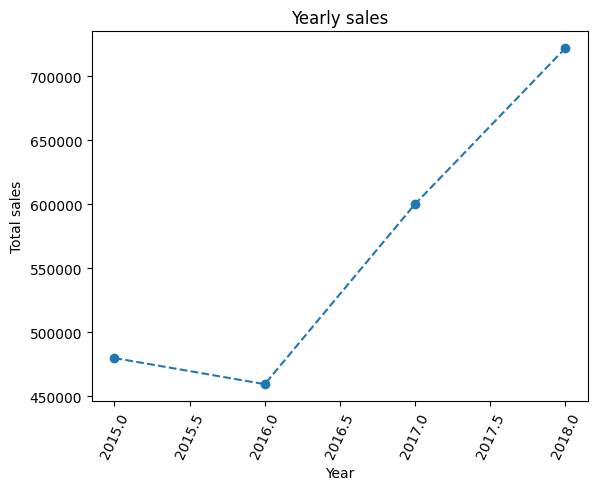

In [48]:
plt.plot(yearly_sales['Year'],yearly_sales['Total Sales'], marker='o', linestyle='--')

plt.title('Yearly sales')
plt.xlabel('Year')
plt.ylabel('Total sales')

plt.xticks(rotation=65)
plt.show()

## Quaterly Sales


In [54]:
# converting order date to date time format

df['Order Date']= pd.to_datetime(df['Order Date'],dayfirst=True)

# filter data acc to Year
year_sales = df[df['Order Date'].dt.year == 2018 ]

# calculate quaterly sales for 2018

quaterly_sales = year_sales.resample('Q', on='Order Date')['Sales'].sum()

quaterly_sales = quaterly_sales.reset_index()
quaterly_sales = quaterly_sales.rename(columns={'Order Date':'Quater','Sales':'Total Sales'})

print('These are the quaterly sales for 2018')
print(quaterly_sales)

These are the quaterly sales for 2018
      Quater  Total Sales
0 2018-03-31  122260.8842
1 2018-06-30  127558.6200
2 2018-09-30  193815.8400
3 2018-12-31  278416.6750


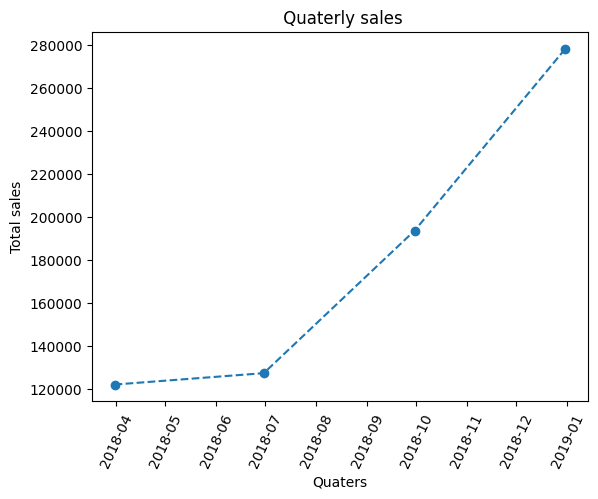

In [55]:
plt.plot(quaterly_sales['Quater'],quaterly_sales['Total Sales'], marker='o', linestyle='--')

plt.title(' Quaterly sales')
plt.xlabel('Quaters')
plt.ylabel('Total sales')

plt.xticks(rotation=65)
plt.show()

## Monthly Sales Trends

In [56]:
df['Order Date']= pd.to_datetime(df['Order Date'],dayfirst=True)

year_sales = df[df['Order Date'].dt.year == 2018]

monthly_sales =  year_sales.resample('M', on='Order Date')['Sales'].sum()

monthly_sales = monthly_sales.reset_index()
monthly_sales = monthly_sales.rename(columns={'Order Date':'Quater','Sales':'Total Sales'})

print('These are the quaterly sales for 2018')
print(quaterly_sales)

These are the quaterly sales for 2018
      Quater  Total Sales
0 2018-03-31  122260.8842
1 2018-06-30  127558.6200
2 2018-09-30  193815.8400
3 2018-12-31  278416.6750


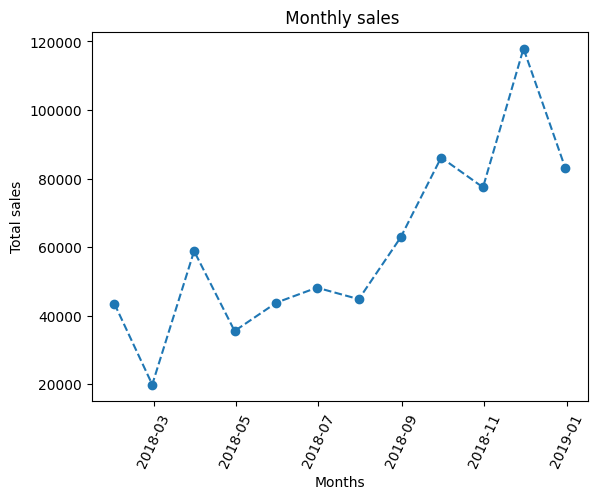

In [57]:
plt.plot(monthly_sales['Quater'],monthly_sales['Total Sales'], marker='o', linestyle='--')

plt.title(' Monthly sales')
plt.xlabel('Months')
plt.ylabel('Total sales')

plt.xticks(rotation=65)
plt.show()